# Astroquery (PHYS265)

The astroquery package is introduced here with a focus on astroquery.simbad to acquire distance, right ascension, and declination to create a 3D plot of stars within 10 parsecs of the Sun.

# Install the Astroquery Package

We start by installing the astroquery package using the standard pip install command.

In [1]:
!pip install astroquery

# Import astroquery, astroquery.simbad, pandas, and matplotlib

Since astroquery.simbad does not have any plotting capabilities we must import matplotlib to plot the data acquired by the query which is put into a table by default. Pandas is imported to put the queried information into a dataframe that can be easily read and interpreted for analysis.

To query SIMBAD we call with a string like query = """SELECT ra, dec, main_id, rvz_redshift, otype FROM basic WHERE otype != 'star..' AND CONTAINS(POINT('ICRS', basic.ra, basic.dec), CIRCLE('ICRS', 331.92, +12.44 , 0.25)) = 1 AND rvz_redshift <= 0.4""" and then input that string into Simbad.query_tap(query), which is given in the example on the astroquery website. As you can see below this is similar to how I queried SIMBAD.

Once we have this queried information I can input it into a pandas dataframe, rename the columns, calculate the distance in parsecs by using the parallax measurements, ensure that the right ascension and declination are numbers, then create a 3D plot using matplotlib's scatterplot capability, labeling the axes, and adding a colorbar. It may not be apparent but in the plots below there are many stars that overlap due to them having the same right ascension and declination values. After completing this, I sorted the distances from closest to furthest within the 10 parsecs, printed the total number of stars found, then created a nice table using formatted string literals and column width variables to display each star's information in a clearly aligned table format.

Current astroquery version: 0.4.10

Total number of Stars found within 10 Parsecs of the Sun: 569

|Name                           |Distance (Parsecs)|Right Ascension (Degrees) |Declination (Degrees)|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri c        |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri b        |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima d                 |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri          |             1.302|                     217.4|      

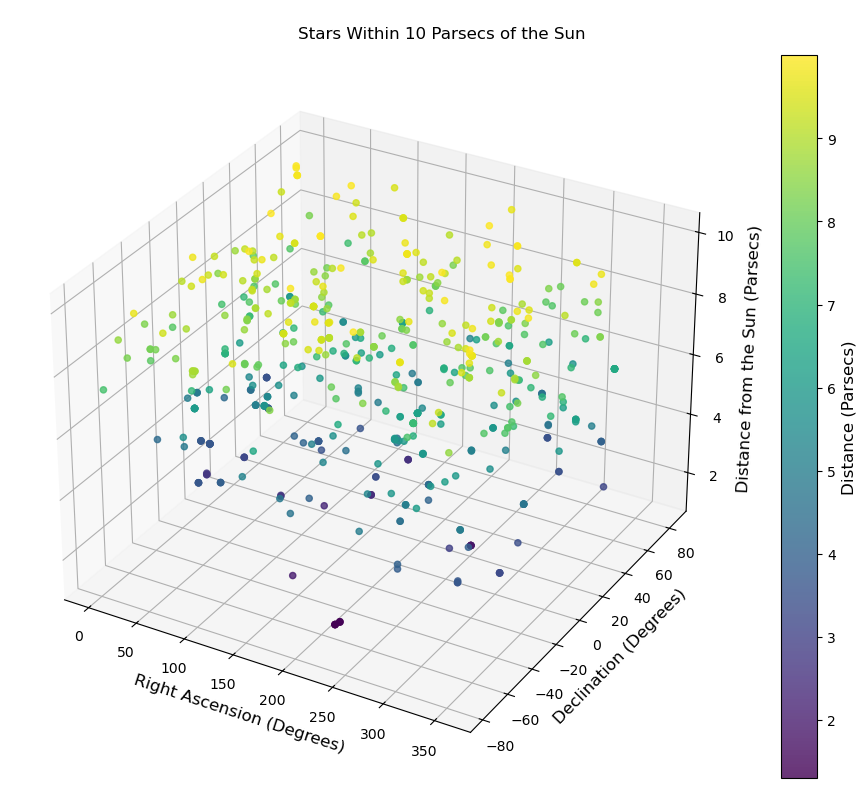

In [2]:
import astroquery
from astroquery.simbad import Simbad
import pandas as pd
import matplotlib.pyplot as plt

print("Current astroquery version:",astroquery.__version__)

# Get stars with parallax >= 100 mas (within 10 parsecs)
query = """ SELECT main_id, ra, dec, plx_value FROM basic WHERE plx_value >= 100 """

# Run the query
result = Simbad.query_tap(query)
if result:
    # Make a dataframe
    df = result.to_pandas()
    
    # Rename the columns to something that is easier to understand
    df = df.rename(columns={"main_id": "Name", "ra": "Right Ascension (Degrees)", "dec": "Declination (Degrees)", "plx_value": "Parallax"})
    
    # Calculate distance in parsecs
    df["Distance (Parsecs)"] = 1 / (df["Parallax"]/1000)
    
    # Ensure that Right Ascension and Declination are numbers
    df["Right Ascension (Degrees)"] = df["Right Ascension (Degrees)"].astype(float)
    df["Declination (Degrees)"] = df["Declination (Degrees)"].astype(float)
                            
    # Make a 3D Plot of Right Ascension, Declination, and Distance
    fig,ax = plt.subplots(figsize=(10,8),subplot_kw={"projection":"3d"})
    
    # Plot the Stars
    scatter = ax.scatter(df["Right Ascension (Degrees)"], df["Declination (Degrees)"], df["Distance (Parsecs)"], c = df["Distance (Parsecs)"], cmap="viridis", alpha = 0.8)
    
    # Add Colorbar
    cbar = fig.colorbar(scatter)
    cbar.set_label("Distance (Parsecs)", fontsize=12)
    
    # Label Axes
    ax.set_xlabel("Right Ascension (Degrees)",fontsize=12)
    ax.set_ylabel("Declination (Degrees)",fontsize=12)
    ax.set_zlabel("Distance from the Sun (Parsecs)",fontsize=12)
    
    # Add title
    fig.suptitle("\nStars Within 10 Parsecs of the Sun",fontsize=12)
    
    ax.grid(True)
    
    fig.tight_layout()
    plt.savefig("265Final.png")
    
    # Sort Stars by distance
    df = df.sort_values(by="Distance (Parsecs)")
    
    # Print Number of Stars
    print(f"\nTotal number of Stars found within 10 Parsecs of the Sun: {len(df)}\n")
    
    # Column widths for nice table formatting
    name_width = 31
    dist_width = 18
    ra_width = 26
    dec_width = 21
    
    # Print Table Header.
    print(f"|{'Name':{name_width}}|{'Distance (Parsecs)':{dist_width}}|{'Right Ascension (Degrees)':{ra_width}}|{'Declination (Degrees)':{dec_width}}|")
    print(f"|{'-'*name_width}|{'-'*dist_width}|{'-'*ra_width}|{'-'*dec_width}|")
    
    # Print Each Star
    for i, row in df.iterrows():
        print(f"|{row['Name']:{name_width}}|{row['Distance (Parsecs)']:{dist_width}.3f}|{row['Right Ascension (Degrees)']:{ra_width}.1f}|{row['Declination (Degrees)']:{dec_width}.1f}|")
        print(f"|{'-'*name_width}|{'-'*dist_width}|{'-'*ra_width}|{'-'*dec_width}|")
else:
    print("No stars found")

# Reproducibility

Here I check to see if this is easily reproducible but with stars within 5 parsecs of the Sun to compare.


Total number of Stars found within 5 Parsecs of the Sun: 128

|Name                           |Distance (Parsecs)|Right Ascension (Degrees) |Declination (Degrees)|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri b        |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri c        |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima d                 |             1.302|                     217.4|                -62.7|
|-------------------------------|------------------|--------------------------|---------------------|
|NAME Proxima Centauri          |             1.302|                     217.4|                -62.7|
|------------------

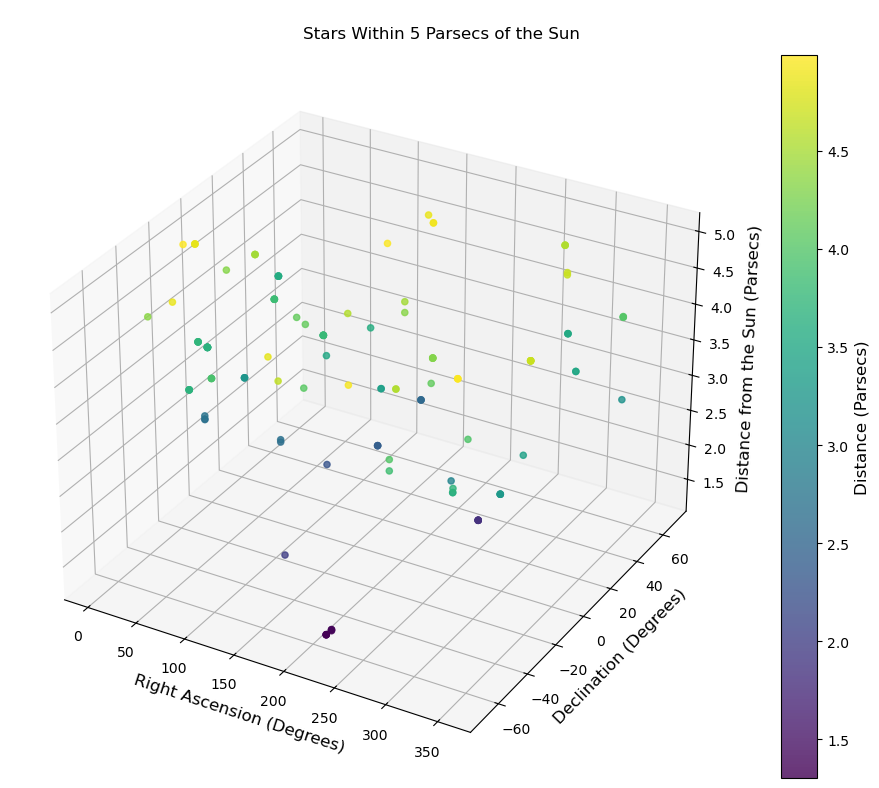

In [3]:
# Get stars with parallax >= 200 mas (within 5 parsecs)
query = """ SELECT main_id, ra, dec, plx_value FROM basic WHERE plx_value >= 200 """

# Run the query
result = Simbad.query_tap(query)
if result:
    # Make a dataframe
    df = result.to_pandas()
    
    # Rename the columns to something that is easier to understand
    df = df.rename(columns={"main_id": "Name", "ra": "Right Ascension (Degrees)", "dec": "Declination (Degrees)", "plx_value": "Parallax"})
    
    # Calculate distance in parsecs
    df["Distance (Parsecs)"] = 1 / (df["Parallax"]/1000)
    
    # Ensure that Right Ascension and Declination are numbers
    df["Right Ascension (Degrees)"] = df["Right Ascension (Degrees)"].astype(float)
    df["Declination (Degrees)"] = df["Declination (Degrees)"].astype(float)
    
     # Make a 3D Plot of Right Ascension, Declination, and Distance
    fig,ax = plt.subplots(figsize=(10,8),subplot_kw={"projection":"3d"})
    
    # Plot the Stars
    scatter = ax.scatter(df["Right Ascension (Degrees)"], df["Declination (Degrees)"], df["Distance (Parsecs)"], c = df["Distance (Parsecs)"], cmap="viridis", alpha = 0.8)
    
    # Add Colorbar
    cbar = fig.colorbar(scatter)
    cbar.set_label("Distance (Parsecs)", fontsize=12)
    
    # Label Axes
    ax.set_xlabel("Right Ascension (Degrees)",fontsize=12)
    ax.set_ylabel("Declination (Degrees)",fontsize=12)
    ax.set_zlabel("Distance from the Sun (Parsecs)",fontsize=12)
    
    # Add title
    fig.suptitle("\nStars Within 5 Parsecs of the Sun",fontsize=12)
    
    ax.grid(True)
    
    fig.tight_layout()
                        
    # Sort Stars by distance
    df = df.sort_values(by="Distance (Parsecs)")
    
    # Print Number of Stars
    print(f"\nTotal number of Stars found within 5 Parsecs of the Sun: {len(df)}\n")
    
    # Column widths for nice table formatting
    name_width = 31
    dist_width = 18
    ra_width = 26
    dec_width = 21
    
    # Print Table Header
    print(f"|{'Name':{name_width}}|{'Distance (Parsecs)':{dist_width}}|{'Right Ascension (Degrees)':{ra_width}}|{'Declination (Degrees)':{dec_width}}|")
    print(f"|{'-'*name_width}|{'-'*dist_width}|{'-'*ra_width}|{'-'*dec_width}|")
    
    # Print Each Star
    for i, row in df.iterrows():
        print(f"|{row['Name']:{name_width}}|{row['Distance (Parsecs)']:{dist_width}.3f}|{row['Right Ascension (Degrees)']:{ra_width}.1f}|{row['Declination (Degrees)']:{dec_width}.1f}|")
        print(f"|{'-'*name_width}|{'-'*dist_width}|{'-'*ra_width}|{'-'*dec_width}|")
else:
    print("No stars found")